# Chapter 9 翻译和总结
吴心远翻译和总结。
文档来源：《Chapter 9 Working with COVID-19 Data》


## 基础安装

先安装。在cmd中使用代码：

pip3 install covid

然后运行导入模块。

In [1]:
from covid import Covid

可以用不同的代码来获取数据。

john_hopkins/worldometers。

下面是获得世卫组织的数据。

In [2]:
covid = Covid(source="worldometers")

可以用这个来显示数据。

In [3]:
covid.get_data()

[{'country': 'North America',
  'total_cases': 64273136,
  'confirmed': 64273136,
  'new_cases': 4605,
  'deaths': 1239829,
  'new_deaths': 127,
  'recovered': 50055863,
  'active': 12977444,
  'active_cases': 12977444,
  'critical': 22806,
  'total_tests': 0,
  'total_tests_per_million': Decimal('0'),
  'total_cases_per_million': Decimal('0'),
  'total_deaths_per_million': Decimal('0'),
  'population': Decimal('0')},
 {'country': 'Asia',
  'total_cases': 84352640,
  'confirmed': 84352640,
  'new_cases': 35285,
  'deaths': 1251799,
  'new_deaths': 510,
  'recovered': 81674419,
  'active': 1426422,
  'active_cases': 1426422,
  'critical': 28985,
  'total_tests': 0,
  'total_tests_per_million': Decimal('0'),
  'total_cases_per_million': Decimal('0'),
  'total_deaths_per_million': Decimal('0'),
  'population': Decimal('0')},
 {'country': 'South America',
  'total_cases': 39567466,
  'confirmed': 39567466,
  'new_cases': 108,
  'deaths': 1191188,
  'new_deaths': 1,
  'recovered': 37438740,

获得国家的数据。

In [4]:
covid.get_status_by_country_name("china")

{'country': 'China',
 'total_cases': 101683,
 'confirmed': 101683,
 'new_cases': 197,
 'deaths': 4636,
 'new_deaths': 0,
 'recovered': 94632,
 'active': 2415,
 'active_cases': 2415,
 'critical': 14,
 'total_tests': 160000000,
 'total_tests_per_million': Decimal('0'),
 'total_cases_per_million': Decimal('71'),
 'total_deaths_per_million': Decimal('3'),
 'population': Decimal('1439323776')}

## 数据处理

用panda数据处理。

In [5]:
import pandas as pd
df = pd.DataFrame(covid.get_data())
print(df)

           country  total_cases  confirmed  new_cases   deaths  new_deaths  \
0    North America     64273136   64273136       4605  1239829         127   
1             Asia     84352640   84352640      35285  1251799         510   
2    South America     39567466   39567466        108  1191188           1   
3           Europe     85044997   85044997     141437  1518736        2747   
4           Africa      9658986    9658986      12683   228278          33   
..             ...          ...        ...        ...      ...         ...   
227          Samoa            3          3          0        0           0   
228   Saint Helena            2          2          0        0           0   
229     Micronesia            1          1          0        0           0   
230          Tonga            1          1          0        0           0   
231          China       101683     101683        197     4636           0   

     recovered    active  active_cases  critical  total_tests  

按照“确诊”对数据进行排序。

exclude是全体数据的排序后结果。

In [6]:
sorted = df.sort_values(by=['confirmed'], ascending=False)

excluded = sorted[~sorted.country.isin(['Europe', 'South America', 'Asia', 'World', 'North America', 'Africa'])]

输出“前十名”。

In [7]:
top10 = excluded.head(10)
print(top10)

    country  total_cases  confirmed  new_cases  deaths  new_deaths  recovered  \
8       USA     54148544   54148544          0  842161           0   41325110   
9     India     34808886   34808886          0  480592           0   34251292   
10   Brazil     22254706   22254706          0  618723           0   21414318   
11       UK     12338676   12338676          0  148021           0   10179898   
12   Russia     10458271   10458271      21119  307022         932    9380223   
13   Turkey      9365399    9365399          0   81917           0    8988852   
14   France      9326258    9326258          0  123188           0    7925743   
15  Germany      7071341    7071341      11995  111879         127    6277400   
16     Iran      6190762    6190762       1905  131527          53    6032615   
17    Spain      6032297    6032297          0   89253           0    5041873   

      active  active_cases  critical  total_tests total_tests_per_million  \
8   11981273      11981273     

筛选数据。

In [8]:
x = top10.country
y1 = top10.confirmed
y2 = top10.active
y3 = top10.deaths
y4 = top10.recovered

## 绘图

导入绘图。

支持中文。

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']

以x和y1绘图。

折线图和条形图。

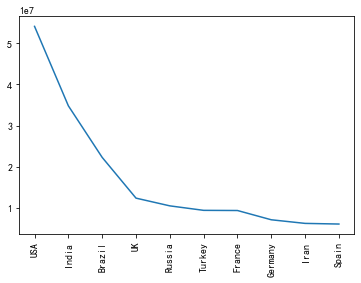

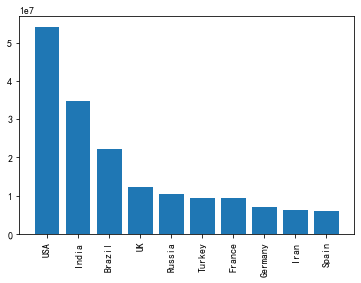

In [10]:
plt.plot(x, y1)
plt.xticks(rotation=90)
plt.show()

plt.bar(x, y1)
plt.xticks(rotation=90)
plt.show()

多个数据在同一行显示。

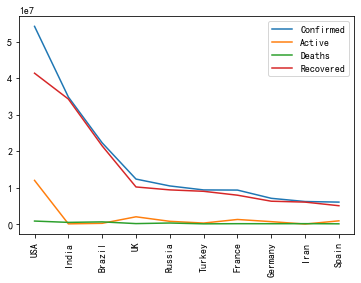

In [11]:
plt.plot(x, y1, label='Confirmed')
plt.plot(x, y2, label='Active')
plt.plot(x, y3, label='Deaths')
plt.plot(x, y4, label='Recovered')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

紧凑和美化。

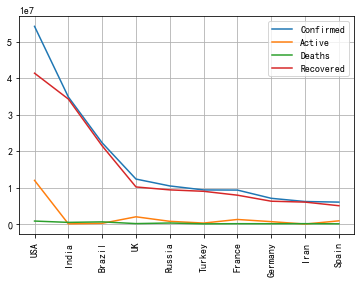

In [12]:
labels = ['Confirmed', 'Active', 'Deaths', 'Recovered']
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.legend(labels, loc='upper right')
plt.xticks(rotation=90)
plt.grid() #绘制网格线
plt.show()

条形图。

竖着的或者堆叠的。

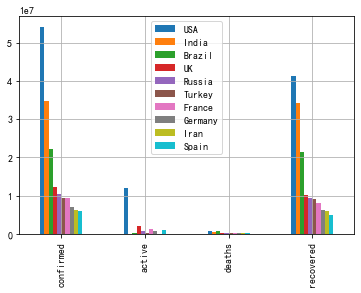

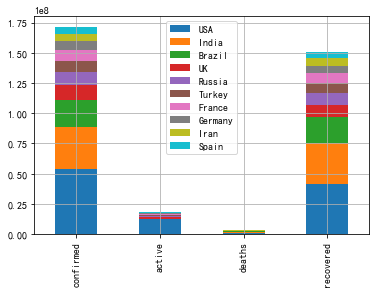

In [13]:
df2 = pd.DataFrame([y1, y2, y3, y4])
df2.plot.bar()
plt.legend(x, loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

df2.plot.bar(stacked=True)
plt.legend(x, loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

水平条形图和水平堆叠条形图。

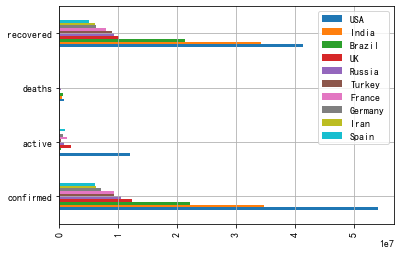

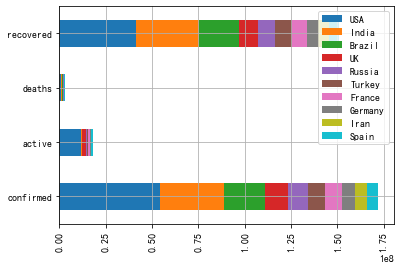

In [14]:
df2.plot.barh()
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

df2.plot.barh(stacked=True)
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

面积图和重叠面积图。

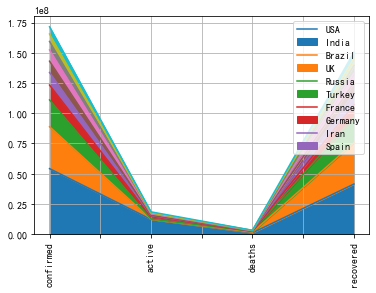

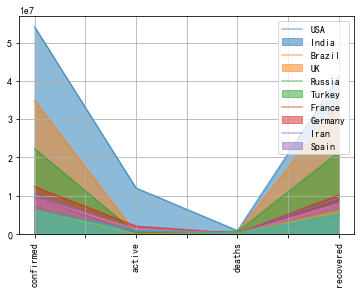

In [15]:
df2.plot.area()
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

df2.plot.area(stacked=False)
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

散点图。

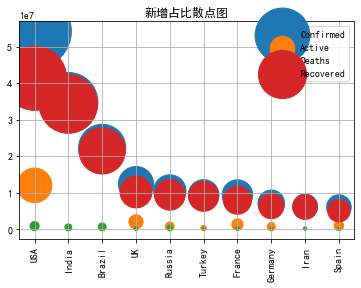

In [16]:
factor=0.0001
plt.scatter(x, y1, s=y1*factor)
plt.scatter(x, y2, s=y2*factor)
plt.scatter(x, y3, s=y3*factor)
plt.scatter(x, y4, s=y4*factor)
plt.legend(labels, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.title('新增占比散点图')
plt.show()

饼图。

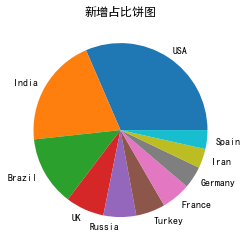

In [17]:
plt.pie(y1, labels=x)
plt.title('新增占比饼图')
plt.show()